# **Heart Disease**
Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. CVD includes all heart and circulatory diseases, including coronary heart disease, angina, heart attack, congenital heart disease, hypertension, stroke and vascular dementia.

 Cardiovascular disease (CVD) is the main reason of the death if considered globally which has been resulted 17.9 million people. The main targeted people for this are basically the adults

# **Importing the Libraries**

In [1]:
# Importing pandas as pd
import pandas as pd
# Importing matplotlib as mt
import matplotlib as mt
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
# Importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
# Importing OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder
# Importing make_imbalance from imblearn
from imblearn.datasets import make_imbalance
# Importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing counter from collection
from collections import Counter

# **Loading the dataset**

In [2]:
# loading the dataset in csv from to data variable
data = pd.read_csv('heart.csv')
# to print the loaded dataset
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **Pre-Processing and Cleaning the data**

In [3]:
# cleanup is used here to convert the datapytes
cleanup = {"Sex": {"F":0, "M":1},
          "ExerciseAngina": {"N":0, "Y":1},
           "ST_Slope": {"Up":0, "Flat":1}
          }
data.replace(cleanup, inplace=True)
# to print first 5 rows of dataset we use head command
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,0,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,0,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,0,0


In [4]:
# the command to check the types of data is
data.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
# get_dummies is used as one-hot encode for categorical data
data=pd.get_dummies(data)
# to print first 5 rows of dataset we use head command
data.head

<bound method NDFrame.head of      Age  Sex  RestingBP  ...  ST_Slope_0  ST_Slope_1  ST_Slope_Down
0     40    1        140  ...           1           0              0
1     49    0        160  ...           0           1              0
2     37    1        130  ...           1           0              0
3     48    0        138  ...           0           1              0
4     54    1        150  ...           1           0              0
..   ...  ...        ...  ...         ...         ...            ...
913   45    1        110  ...           0           1              0
914   68    1        144  ...           0           1              0
915   57    1        130  ...           0           1              0
916   57    0        130  ...           0           1              0
917   38    1        138  ...           1           0              0

[918 rows x 19 columns]>

In [6]:
# the command to check the types of data is
data.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_LVH         uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ST_Slope_0             uint8
ST_Slope_1             uint8
ST_Slope_Down          uint8
dtype: object

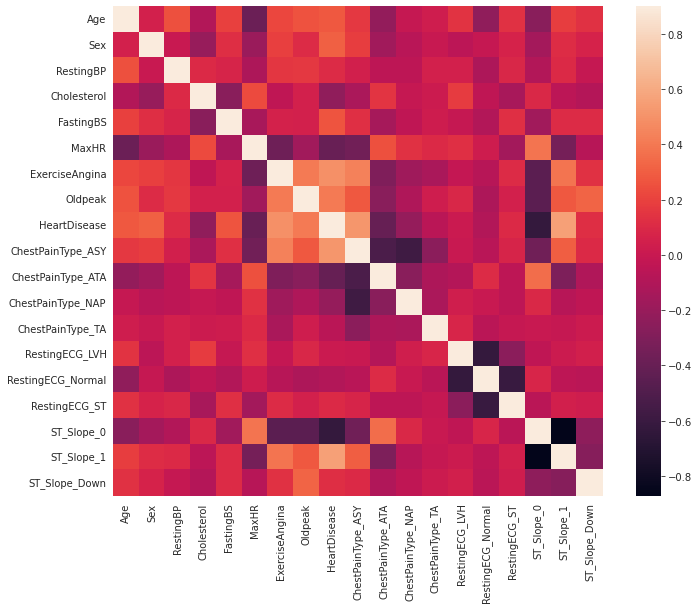

In [7]:
# this is the code for plotting the heat map
color = sns.color_palette()
sns.set_style('darkgrid')
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [8]:
# to count the number of each class in attribute we use value_counts
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [9]:
# here we used isnull for checking any null value is present or not
data.isnull().sum(axis = 0)

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
HeartDisease         0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ST_Slope_0           0
ST_Slope_1           0
ST_Slope_Down        0
dtype: int64

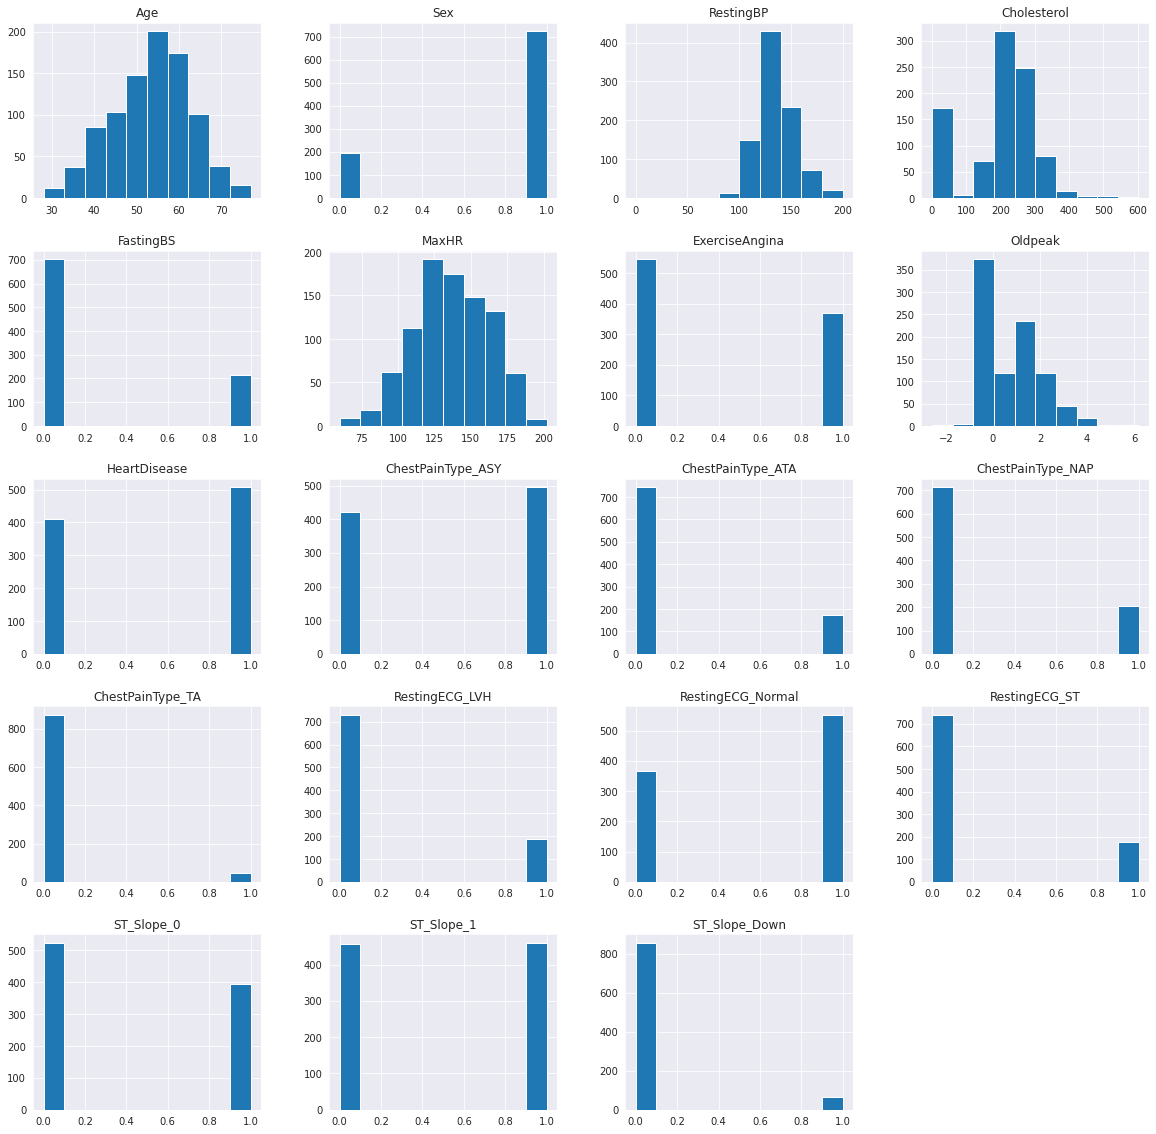

In [10]:
# Plotting histograms for all the attributes of dataset
data.hist(figsize = (20,20))
plt.show()

In [11]:
# copying the data of heart disease to y variable
y = data['HeartDisease'].copy()
# dropping the heart disease attribute from dataset and storing it in x variable
x = data.drop(['HeartDisease'], axis = 1)
# printing the number of class present in y with their time of occurance
print(f'Distribution Before Imblancing : {Counter(y)}')

Distribution Before Imblancing : Counter({1: 508, 0: 410})


In [12]:
#Calculating the imbalance percentage in the dataset
imbalance = len(data[data['HeartDisease'] == 0])/len(data)*100
imbalance

44.66230936819172

<function matplotlib.pyplot.show>

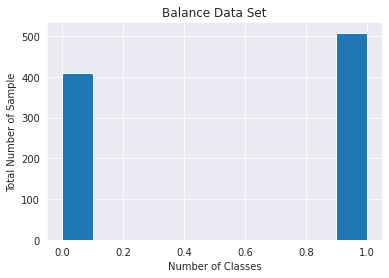

In [13]:
# plotting the histogram for low imbalancing
hist = data['HeartDisease'].hist()
# tile of histogram
plt.title('Balance Data Set')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [14]:
# saving the figure in jpg format of hist
fig= hist.get_figure()
fig.savefig('Hist_Main%.jpg')

# **Low imblance**
**The dataset over here is 65% Imbalanced**

In [15]:
# making the data imbalance by 65% and storing it in XA and YA
XA, YA = make_imbalance(x, y, 
                          sampling_strategy={1: 508, 0: 281},
                        random_state = 42)
# printing the count after low imbalancing
print(f'Distribution After Imblancing 65%: {Counter(YA)}')

Distribution After Imblancing 65%: Counter({1: 508, 0: 281})


<function matplotlib.pyplot.show>

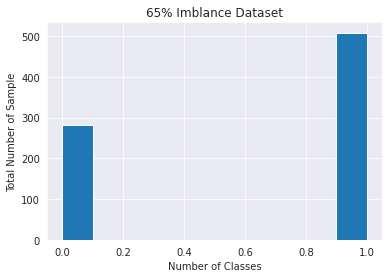

In [16]:
# plotting the histogram for low imbalancing
hist2 = YA.hist()
# tile of histogram
plt.title('65% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [17]:
# saving the figure in jpg format of hist
fig= hist.get_figure()
fig.savefig('Hist_65%.jpg')

# **Medium Imblance**
**The dataset over here is 75% Imbalanced**

In [18]:
# making the data imbalance by 75% and storing it in XB and YB
XB, YB = make_imbalance(x, y, 
                          sampling_strategy={1: 508, 0: 177},
                        random_state = 42)
# printing the count after medium imbalancing
print(f'Distribution After Imblancing 75% : {Counter(YB)}')

Distribution After Imblancing 75% : Counter({1: 508, 0: 177})


<function matplotlib.pyplot.show>

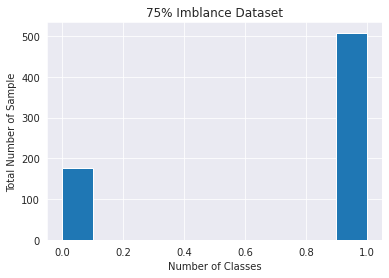

In [19]:
# plotting the histogram for low imbalancing
hist2 = YB.hist()
# tile of histogram
plt.title('75% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [20]:
# saving the figure in jpg format of hist
fig= hist.get_figure()
fig.savefig('Hist_75%.jpg')

# **High Imbalance**
**The dataset over here is 90% Imbalanced**

In [21]:
# making the data imbalance by 90% and storing it in XC and YC
XC, YC = make_imbalance(x, y, 
                          sampling_strategy={1: 508, 0: 64},
                        random_state = 42)
# printing the count after High imbalancing
print(f'Distribution After Imblancing 90% : {Counter(YC)}')

Distribution After Imblancing 90% : Counter({1: 508, 0: 64})


<function matplotlib.pyplot.show>

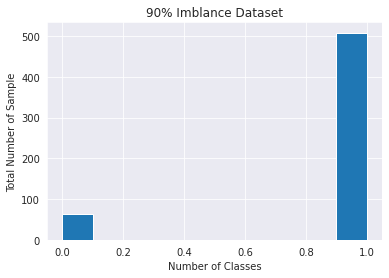

In [22]:
# plotting the histogram for low imbalancing
hist2 = YC.hist()
# tile of histogram
plt.title('90% Imblance Dataset')
# label for x-axis
plt.xlabel('Number of Classes')
# label for y-axis
plt.ylabel('Total Number of Sample')
# to display histogram
plt.show

In [23]:
# saving the figure in jpg format of hist
fig= hist.get_figure()
fig.savefig('Hist_90%.jpg')

# **Sampling**